In [5]:
import numpy as np
import galsim
import matplotlib.pyplot as plt
import sep
from shrbk.data import get_galaxy_image

# Metadetection



## Description

<span style="font-variant:small-caps;">Metadetection</span> is a method first described in {cite}`Sheldon2020`, based on the <span style="font-variant:small-caps;">Metacalibration</span> method. Its primary objective is to adress detection bias, in particular the case where objects are blended (see {ref}`section:deblending` and {ref}`section:blendingbias` for more details on blending). In principle, <span style="font-variant:small-caps;">Metacalibration</span> should not suffer from bias from blended objects, provided the detection is accurate ; however blending does have an impact on detection. We will focus mainly on this particular issue since it is the most prevalent and is also the one on which the main paper focuses on, but keep in mind that <span style="font-variant:small-caps;">Metadetection</span> also adresses other detection biases.

To adress this issue, <span style="font-variant:small-caps;">Metadetection</span> introduces a small variation to the <span style="font-variant:small-caps;">Metacalibration</span> method. In <span style="font-variant:small-caps;">Metacalibration</span>, the detection is done in the first step, giving a single catalog, which is then used to generate postage stamps for each object, on which artificial shear is applied to compute the response to shear on each object. In <span style="font-variant:small-caps;">Metadetection</span>, detection is carried out on sheared images : the images are first sheared, then the detection is done on each sheared image (yielding slightly different catalogs), and response is computed accordingly ; this requires a small modification of the response computation : the equation \\[
\langle R_{ij} \rangle = \left\langle \frac{e_i^+ - e_i^-}{\Delta \gamma_j} \right\rangle 
\\]
becomes \\[
\langle R_{ij} \rangle =  \frac{\langle e_i^+ \rangle - \langle e_i^- \rangle}{\Delta \gamma_j}
\\]
meaning that we compute the difference of the means instead of the mean of the differences ; this is strictly equivalent in the case of a single catalog, but will differ when the catalogs are not the same (please note that the mean is computed on the single non-sheared detection catalog in the first case, while the two means in the second equation are computed over two different catalogs, one with positive shear and one with negative shear).

## Example

We will reuse examples similar to those of the {ref}`section:deblending` and {ref}`section:blendingbias` sections. In the first scene, the two galaxies are heavily blended and the detection algorithm (SExtractor python implementation) only detects one object.

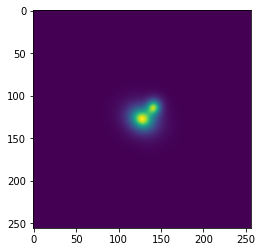

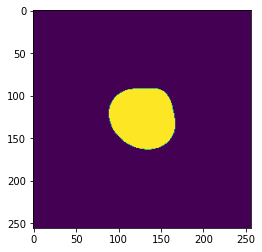

In [50]:
image_central, image_psf = get_galaxy_image(gal_flux=1.e5,gal_r0=1.4,g1=0.05,g2=0.1,psf_beta=5,psf_re=1.0,
                                            pixel_scale=0.2)
image_companion, _ = get_galaxy_image(gal_flux=3.e4,gal_r0=0.6,g1=-0.08,g2=-0.08,psf_beta=5,psf_re=1.0,
                                            pixel_scale=0.2,shift_x=2.7,shift_y=-2.7)
blended_scene = galsim.ImageD(256,256)
blended_scene += image_central
blended_scene += image_companion
plt.imshow(blended_scene.array)
plt.show()

img = blended_scene.array
cat,segmentation = sep.extract(img,2,segmentation_map=True)
plt.imshow(segmentation)
plt.show()

Now, we apply an artificial shear of 0.1 on the image. For the sake of simplicity, here we apply it directly on the simulated objects, before the PSF is applied ; but recall that in the <span style="font-variant:small-caps;">Metacalibration</span> process, one should deconvolve the PSF, apply the shear to the image and reconvolve with a slightly larger PSF. Also, the whole image would be sheared, including the space between the galaxies, and not only the galaxies themselves. Keep in mind that the effects are greatly exagerated here for the sake of demonstration ; the benefits of <span style="font-variant:small-caps;">Metadetection</span> in real life are only visible in statistics.

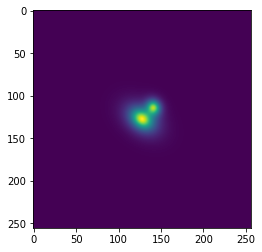

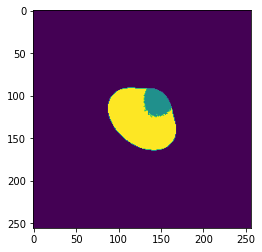

In [49]:
artificial_shear = 0.1
image_central, image_psf = get_galaxy_image(gal_flux=1.e5,gal_r0=1.4,g1=0.05,g2=0.1+artificial_shear,psf_beta=5,psf_re=1.0,
                                            pixel_scale=0.2)
image_companion, _ = get_galaxy_image(gal_flux=3.e4,gal_r0=0.6,g1=-0.08,g2=-0.04+artificial_shear,psf_beta=5,psf_re=1.0,
                                            pixel_scale=0.2,shift_x=2.7,shift_y=-2.7)
blended_scene = galsim.ImageD(256,256)
blended_scene += image_central
blended_scene += image_companion
plt.imshow(blended_scene.array)
plt.show()

img = blended_scene.array
cat,segmentation = sep.extract(img,2,segmentation_map=True)
plt.imshow(segmentation)
plt.show()

Now two objects are detected : there is a different catalog for the unsheared and for the sheared image. Let's see the result when we apply positive and negative shear on the two shear components, as in the regular <span style="font-variant:small-caps;">Metacalibration</span> process.

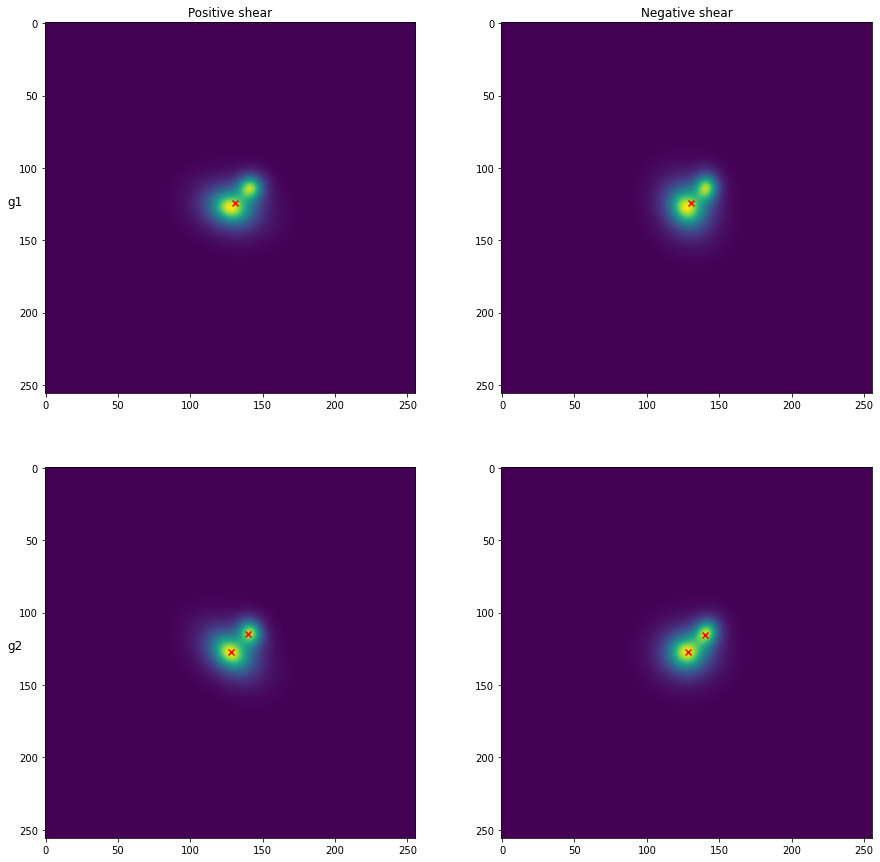

In [61]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
artificial_shear = 0.1
image_central, image_psf = get_galaxy_image(gal_flux=1.e5,gal_r0=1.4,g1=0.05,g2=0.1+artificial_shear,psf_beta=5,psf_re=1.0,
                                            pixel_scale=0.2)
image_companion, _ = get_galaxy_image(gal_flux=3.e4,gal_r0=0.6,g1=-0.08,g2=-0.04+artificial_shear,psf_beta=5,psf_re=1.0,
                                            pixel_scale=0.2,shift_x=2.7,shift_y=-2.7)
blended_scene = galsim.ImageD(256,256)
blended_scene += image_central
blended_scene += image_companion
ax[1][0].imshow(blended_scene.array)

img = blended_scene.array
cat,segmentation = sep.extract(img,2,segmentation_map=True)
ax[1][0].scatter(cat['x'],cat['y'],marker='x',color='red')


image_central, image_psf = get_galaxy_image(gal_flux=1.e5,gal_r0=1.4,g1=0.05,g2=0.1-artificial_shear,psf_beta=5,psf_re=1.0,
                                            pixel_scale=0.2)
image_companion, _ = get_galaxy_image(gal_flux=3.e4,gal_r0=0.6,g1=-0.08,g2=-0.04-artificial_shear,psf_beta=5,psf_re=1.0,
                                            pixel_scale=0.2,shift_x=2.7,shift_y=-2.7)
blended_scene = galsim.ImageD(256,256)
blended_scene += image_central
blended_scene += image_companion
ax[1][1].imshow(blended_scene.array)

img = blended_scene.array
cat,segmentation = sep.extract(img,2,segmentation_map=True)
ax[1][1].scatter(cat['x'],cat['y'],marker='x',color='red')


image_central, image_psf = get_galaxy_image(gal_flux=1.e5,gal_r0=1.4,g1=0.05+artificial_shear,g2=0.1,psf_beta=5,psf_re=1.0,
                                            pixel_scale=0.2)
image_companion, _ = get_galaxy_image(gal_flux=3.e4,gal_r0=0.6,g1=-0.08+artificial_shear,g2=-0.04,psf_beta=5,psf_re=1.0,
                                            pixel_scale=0.2,shift_x=2.7,shift_y=-2.7)
blended_scene = galsim.ImageD(256,256)
blended_scene += image_central
blended_scene += image_companion
ax[0][0].imshow(blended_scene.array)

img = blended_scene.array
cat,segmentation = sep.extract(img,2,segmentation_map=True)
ax[0][0].scatter(cat['x'],cat['y'],marker='x',color='red')


image_central, image_psf = get_galaxy_image(gal_flux=1.e5,gal_r0=1.4,g1=0.05-artificial_shear,g2=0.1,psf_beta=5,psf_re=1.0,
                                            pixel_scale=0.2)
image_companion, _ = get_galaxy_image(gal_flux=3.e4,gal_r0=0.6,g1=-0.08-artificial_shear,g2=-0.04,psf_beta=5,psf_re=1.0,
                                            pixel_scale=0.2,shift_x=2.7,shift_y=-2.7)
blended_scene = galsim.ImageD(256,256)
blended_scene += image_central
blended_scene += image_companion
ax[0][1].imshow(blended_scene.array)

img = blended_scene.array
cat,segmentation = sep.extract(img,2,segmentation_map=True)
ax[0][1].scatter(cat['x'],cat['y'],marker='x',color='red')

ax[0][0].set_title("Positive shear")
ax[0][1].set_title("Negative shear")
ax[0][0].set_ylabel("g1",rotation=0,size='large')
ax[1][0].set_ylabel("g2",rotation=0,size='large')
plt.show()

## Performance

<span style="font-variant:small-caps;">Metadetection</span> was evaluated on simulated pairs of galaxies, much like the one above but more realistic (bulge, random knots, noise), and on simulated field images designed to ressemble LSST year 10 and DES year 5 images. SExtractor was used for detection, though similar results were obtained when using a simple peak detection algorithm, or when deblending using Multiple Object Fitting.

They report a bias around 3.5% when using regular <span style="font-variant:small-caps;">Metacalibration</span>, dropping to only 0.15% with <span style="font-variant:small-caps;">Metadetection</span>, on images similar to DES Y5. In order to confirm that most of the bias was due to the blending, they also ran <span style="font-variant:small-caps;">Metacalibration</span> with both the true detections and the SExtractor detections ; in the first case they achieved a sub-percent bias, while in the second case thay obtained a 5.8% bias, meaning that blending was the main factor.

Using the pair simulations, they experimented on how the distance between the blended galaxies affected the shear bias. They found that the critical point is at 1.5 arcseconds separation ; at this separation, objects are correctly detected only half the time. At lower separation, the pair is consistantly detected as one object, and at a higher one the two objects are consistantly detected as separate galaxies ; this is also the point where the bias from <span style="font-variant:small-caps;">Metacalibration</span> is the highest. This means that <span style="font-variant:small-caps;">Metacalibration</span> is mostly affected by "ambiguous blends". In contrast, <span style="font-variant:small-caps;">Metadetection</span> is also affected in the same way by those ambiguous blends but to a much lower amplitude.

One of the issues which is not adressed by <span style="font-variant:small-caps;">Metadetection</span> is the possibility to have different shears for the blended objects, which may introduce a bias in the response ; see {ref}`section:blendingbias` for more details.